# Python package: aggscatpy

The ``AggScatVIR`` package provides some python tools that may be useful for users to quickly delve into the optical properties stored in this database. The main functionalities of this tool are:
(1) view each particle geometry,
(2) check and plot the optical properties of dust particles stored in this database,
(3) convert the unit of the scattering matrix elements from RADMC-3D's definition to Bohren & Huffman's definition,
(4) change the power-law index of size distribution and the chop angle from the default values, 
(5) output datafiles in various formats.

In this section, we demonstrate how to use the package.

## View particle geomertry

The first thing we need to do is to import the package:

In [1]:
from aggscatpy import *

The ``view_particle`` function outputs a particle geometry used to compute the optical properties. For example,

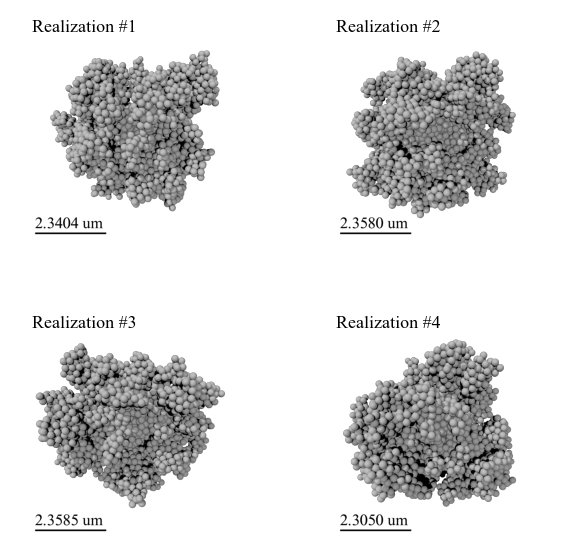

In [2]:
aggscatpy.view_particle(partype='CALP',size='4096',amon='100nm')

where ``partype`` is the particle type, ``size`` is the size of the aggregate (in units of the number of monomers), and ``amon`` is the monomer radius. The arguments take values that are the same as what we used in their file names.  By default, the command will display all (four) realizations. If you would like to display one of the realization, then you can specify it in the argument. Note that **the index for counting realizations starts from 1, not 0.**

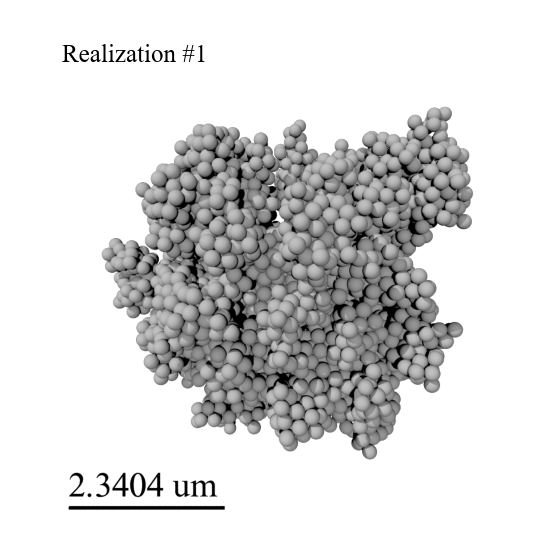

In [3]:
aggscatpy.view_particle(partype='CALP',size='4096',amon='100nm',ireal='1')

We can get a list of a possible combination between the ``amon`` and ``size`` arguments by using the ``get_sizelist`` function:

In [4]:
aggscatpy.get_sizelist('CALP')

 Available amon and size for CALP
 amon='100nm' | size='8','16','32','64','128','256','512','1024','2048','4096'
 amon='200nm' | size='8','16','32','64','128','256','512'
 amon='400nm' | size='8','16','32','64'


The command to diaplay irregular grains is

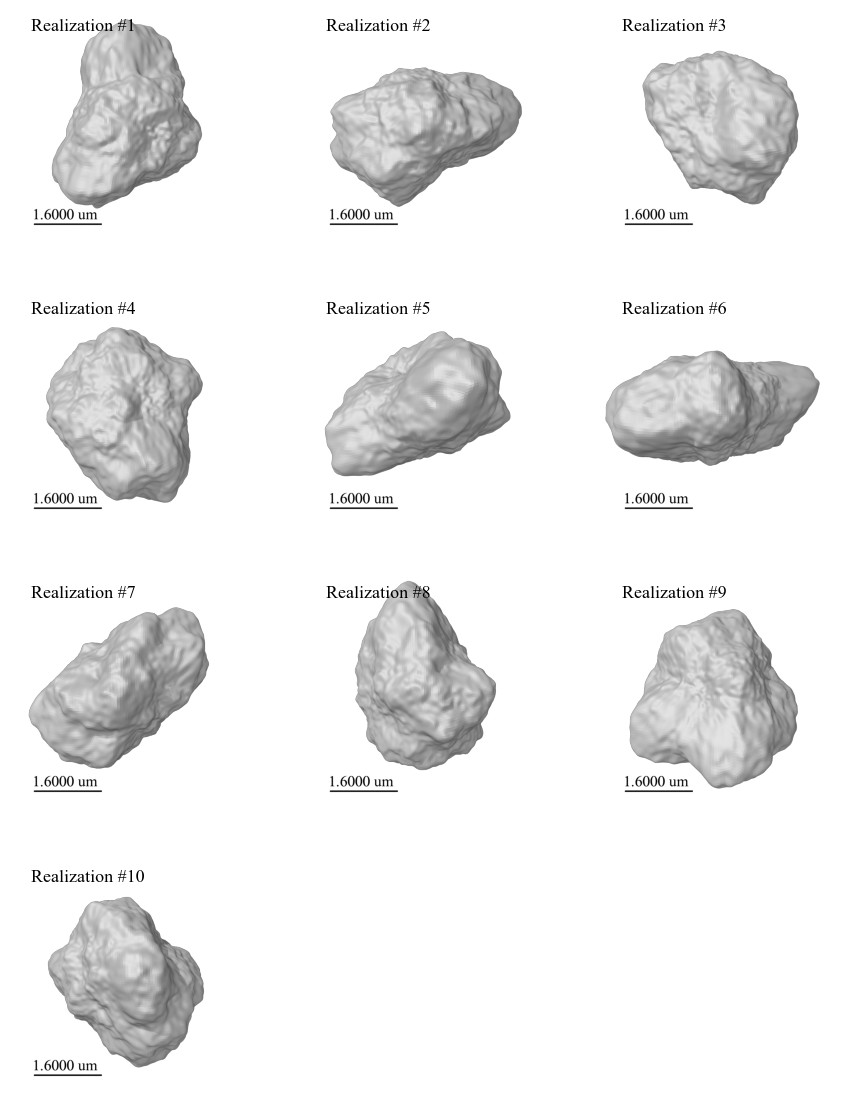

In [5]:
aggscatpy.view_particle(partype='grs',size='1_6000')

In this case, `partype` has to be `'grs'`. The `size` argument represents the volume-equivalent radius of maximum grains in the size distribution in units of microns (the decimal point needs to be replaced by an underscore). For example, `size='1_6000'` means that the volume-equivalent radius (of the maximum grain) is $1.6~\mu$m. By default, the command will display all (ten) realizations.

You can get a list of the available size argument for irregular grains:

In [6]:
aggscatpy.get_sizelist('grs')

['0_2000',
 '0_2520',
 '0_3175',
 '0_4000',
 '0_5040',
 '0_6350',
 '0_8000',
 '1_0079',
 '1_2699',
 '1_6000']

## Get the optical properties of each dust model

### Basic formula

Let's read one of dustkapscatmat_XXX.inp stored in the ``AggScatVIR`` database. To do this, we can use the ``dustmodel`` class. 

The basic command for accessing a dust file for aggregates is

In [7]:
a=aggscatpy.dustmodel(partype='CALP',size='4096',amon='100nm',comp='amc')

where ``partype`` is the particle type, ``size`` is the size of the largest aggregate in the size distribution (in units of the number of monomers),  ``amon`` is the monomer radius, and ``comp`` is the monomer composition. After running this command, the instance ``a`` contains the physical and optical properties of the dust model of ``CALP_Nmax4096_100nm_amc``. 

Similarly, the command for a dust file for irregular grains is

In [8]:
b=aggscatpy.dustmodel(partype='grs',size='1_6000',comp='org')

By default, the `dustmodel` class will read a dust file **with size distribution and without any forward-scattering chopping**. If you would like to change these, you need to specify two additional arguments: `dist` and `chop` when calling the `dustmodel` class. For example, if you want to switch off the size distribution, you need to set `dist=False` (default: `dist=True`). If you would like to have the data with chopped forward scattering, you can set either `chop='chop5'` or `chop='chop10'` (default: `chop='nochop'`). ``chop5`` and ``chop10`` refer to cases where the forward scattering peak is chopeed below scattering angles of 5 or 10 degrees, respectively. Thus if you need the optical properties without assuming particle-size distribution and with the forward-scattering chopping of 5 degrees, the command becomes

In [9]:
a2=aggscatpy.dustmodel(partype='CALP',size='4096',amon='100nm',comp='amc',dist=False,chop='chop5')

### Check physical and optical properties

Each instance created by ``dustmodel`` contains the physical and optical properties of the dust model as its attributes  (see Appendix C for the attributes). The python tool inclues some functions that allow us to quick overview of the values stored in its attributes.

We can display the physical properties of the dust particle stored in the instance ``a`` by using the `dustspec` function:

In [10]:
aggscatpy.dustspec(a)

=============== Dust Parameters ================
 Model name = CALP_Nmax4096_100nm_amc
 Monomer radius           (um) = 0.10000 
 Material density       (g/cc) = 1.7779 
 -----Minimum aggregate in the distribution-----
 Number of monomers            = 8    
 Volume-eq radius         (um) = 2.00000e-01
 Characteristic radius    (um) = 2.22916e-01
 Porosity                  (%) = 27.78  
 -----Maximum aggregate in the distribution-----
 Number of monomers            = 4096 
 Volume-eq radius         (um) = 1.60000e+00
 Characteristic radius    (um) = 2.34047e+00
 Porosity                  (%) = 68.05  
 -----------------------------------------------
 Power-law index of size dist. = 3.50000e+00
 chop angle (deg)              = 0.00000e+00


Note that the above parameters are the averaged values for all realizations.

Also, we can make some plots for the optical properties of the dust particle by using the ``showmodel`` function:

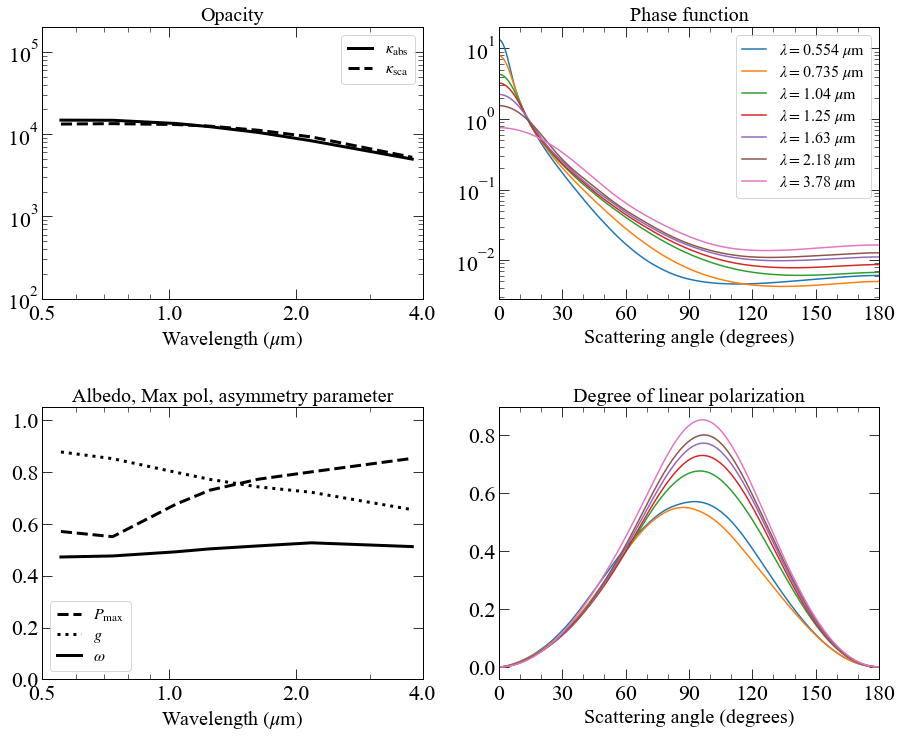

In [11]:
aggscatpy.showmodel(a)

The above plots summarize the absorption and scattering opacities ($\kappa_\mathrm{abs}$, $\kappa_\mathrm{sca}$) (*left top*), the single scattering albedo ($\omega$), the asymmetry parameter ($g$), and the maximum degree of linear polarization ($P_\mathrm{max}$) (*left bottom*), the scattering phase function (*right top*) and the degree of linear polarization (*right bottom*) at various wavelengths. 

The ``showmodel`` function has some options that might be useful for you: (1) If you set ``opacity=False``, the left top panel will be replaced by cross sections ($\mu\mathrm{m}^2$) instead of the opacity ($\mathrm{cm}^2/\mathrm{g}$) (2) If you set ``savefig=True``, the plot will be saved.  The file name will be generated automaticlly, but you can set your own file name by further adding ``fn=your_favorate_filename``.


If you would like to do more flexible analysis, it is good to directly look into the values stored as attributes in each instance. For example, you can get the values of wavelength, opacity, and asymmetry parameter:

In [12]:
print('%13s '*4%("lambda","kabs","ksca","asym"))
for i in range(a.nlmd):
    print('%13.6e '*4%(a.lmd[i],a.kabs[i],a.ksca[i],a.asym[i]))

       lambda          kabs          ksca          asym 
 5.540000e-01  1.478310e+04  1.324085e+04  8.782218e-01 
 7.350000e-01  1.471897e+04  1.339719e+04  8.523817e-01 
 1.040000e+00  1.345137e+04  1.305858e+04  7.994422e-01 
 1.250000e+00  1.230322e+04  1.249605e+04  7.724140e-01 
 1.630000e+00  1.047132e+04  1.113624e+04  7.433839e-01 
 2.180000e+00  8.285653e+03  9.240539e+03  7.224008e-01 
 3.780000e+00  4.970084e+03  5.227980e+03  6.553526e-01 


The scattering angle grid is

In [13]:
print(a.scatang)

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180.]


Each instance contains the scattering phase function (``phase``) and 6 scattering matrix elements (``smat11``,``smat12``,``smat22``,``smat33``,``smat34``,``smat44``) as its attributes. Note that the scattering matrix elements follow the RADMC-3D definition $Z_{ij}$ (though you can change the definition into the Bohren & Huffman one if you want; see the next section for more information). Each of them is a function of wavelength and scattering angle, resulting in a two-dimensional array. For example, $Z_{11}(\lambda,\theta)$ has the shape of:

In [14]:
print(a.smat11.shape)

(7, 181)


To fix the wavelength value, the first dimension should be fixed to the same index (note that the index starts from 0 as usual in python):

In [15]:
iwav=0# index for the wavelength grid
print('wavelength (um) =',a.lmd[iwav])
print(a.smat11[iwav,:])

wavelength (um) = 0.554
[1.78523701e+05 1.72076762e+05 1.54313366e+05 1.29350307e+05
 1.02329476e+05 7.77059918e+04 5.80906878e+04 4.40254779e+04
 3.45653906e+04 2.81956832e+04 2.35910583e+04 1.99552039e+04
 1.69623229e+04 1.45235619e+04 1.25808977e+04 1.10308479e+04
 9.74923875e+03 8.64216597e+03 7.66671589e+03 6.81441283e+03
 6.08339622e+03 5.46071838e+03 4.92454864e+03 4.45354507e+03
 4.03431975e+03 3.66028830e+03 3.32782113e+03 3.03245312e+03
 2.76826197e+03 2.52943988e+03 2.31199302e+03 2.11382100e+03
 1.93380792e+03 1.77096613e+03 1.62365691e+03 1.49021881e+03
 1.36866106e+03 1.25752151e+03 1.15558195e+03 1.06202720e+03
 9.76284542e+02 8.97925708e+02 8.26541315e+02 7.61695171e+02
 7.02873163e+02 6.49525719e+02 6.01067135e+02 5.56948310e+02
 5.16610929e+02 4.79575309e+02 4.45416373e+02 4.13847323e+02
 3.84689891e+02 3.57845984e+02 3.33254058e+02 3.10838706e+02
 2.90434396e+02 2.71863034e+02 2.54907267e+02 2.39364559e+02
 2.25080190e+02 2.11923313e+02 1.99800694e+02 1.88622796e+02


Thus $Z_{11}(\lambda,\theta)$ for this dust model looks like this:

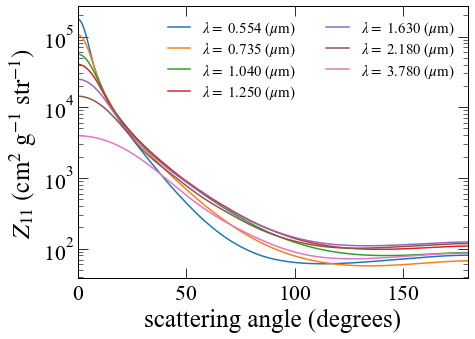

In [16]:
import matplotlib
import matplotlib.pyplot as plt

fig, ax =plt.subplots(figsize=(7,5))
ax.set_ylabel('$Z_{11}~(\mathrm{cm}^2~\mathrm{g}^{-1}~\mathrm{str}^{-1})$')
ax.set_xlim(0,180)
ax.set_yscale('log')
ax.set_xlabel('scattering angle (degrees)')
for iwav in range(a.nlmd):
    label='$\lambda=$ %5.3f ($\mu\mathrm{m}$)'%a.lmd[iwav]
    ax.plot(a.scatang,a.smat11[iwav,:],label=label)
ax.legend(fontsize=15,ncol=2,frameon=False)

### Scattering matrix in Bohren & Huffman's definition

It is sometimes useful to have the scattering matrix elements in the Bohren & Huffman definition. You can switch the definition into Bohren & Huffman's one by setting ``smatBH=True`` when calling the ``dustmodel`` class:

In [17]:
abh=aggscatpy.dustmodel(partype='CALP',size='4096',amon='100nm',comp='amc',smatBH=True)

Now, all the scattering matrix elements (``smat11``,``smat12``,``smat22``,``smat33``,``smat34``,``smat44``) stored in the instance `abh` are given in Bohren & Huffman's definition. Thus $S_{11}(\lambda,\theta)$ looks like this:

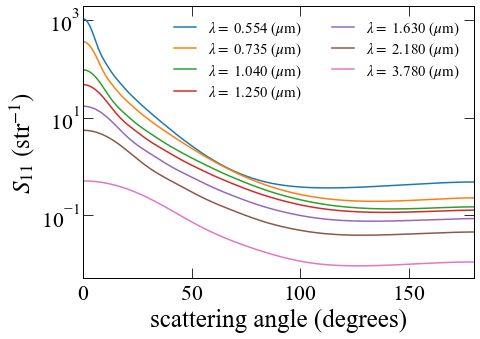

In [18]:
fig, ax =plt.subplots(figsize=(7,5))
ax.set_ylabel('$S_{11}~(\mathrm{str}^{-1})$')
ax.set_xlim(0,180)
ax.set_yscale('log')
ax.set_xlabel('scattering angle (degrees)')
for iwav in range(abh.nlmd):
    label='$\lambda=$ %5.3f ($\mu\mathrm{m}$)'%abh.lmd[iwav]
    ax.plot(abh.scatang,abh.smat11[iwav,:],label=label)
ax.legend(fontsize=15,ncol=2,frameon=False)

## Changing the size distribution and the chop angle

This databse contains the optical properties averaged over a particle-size distribution. The size distribution is assumed to have a simple power-law form: 
$$
n(a_\mathrm{V})da_\mathrm{V}\propto a_\mathrm{V}^{-q}da_\mathrm{V}~(a_\mathrm{min}\le a_\mathrm{V} \le a_\mathrm{max}),
$$
where $a_\mathrm{V}$ is the volume-equivalent radius and $n(a_\mathrm{V})da_\mathrm{V}$ is the number density of particles within a radius range of $[a_\mathrm{V},a_\mathrm{V}+da_\mathrm{V}]$. For aggregates, 
$$
a_\mathrm{min}=a_\mathrm{mon}N_\mathrm{min}^{1/3},\\
a_\mathrm{max}=a_\mathrm{mon}N_\mathrm{max}^{1/3},
$$
where $N_\mathrm{min}$ and $N_\mathrm{max}$ are the number of monomers of the smallest and largest aggregate in the size distribution, respectively. By default, we assume $q=3.5$, $N_\mathrm{min}=8$ for aggregates, and $a_\mathrm{V,min}=0.2~\mu$m for irregular grains. 

However, you may be interested in the optical properties for different size distributions, such as $q\ne3.5$ . To accommodate this, this python tool provides another class called ``distaverage``, which allows for size-distribution averaging of the optical properties with user-specified values for $a_\mathrm{min}$, $a_\mathrm{max}$, and $q$. The ``distaverage`` class can also be utilized to modify the chop angle to arbitrary values.

### Basic formula

The basic command is

In [19]:
d=aggscatpy.distaverage(partype='CALP',sizemin='8',sizemax='4096',comp='amc',amon='100nm',powind=3.5)

The newly created instance ``d`` contains the distribution-averaged optical properties. The ``sizemin`` and `sizemax` represent the smallest and largest aggregates in the distribution in units of the number of monomers, respectively, and ``powind`` is the power-law index.

For irregular grains, the command looks like this:

In [20]:
e=aggscatpy.distaverage(partype='grs',sizemin='0_2000',sizemax='1_6000',comp='org', powind=3.5)

As with the case of ``dustmodel``, an instance created by ``distaverage`` can be substituted into functions: ``dustspec()``, ``showmodel()``, and ``write_data()`` (the last function will be introduced later).

Since the parameters used above are exactly the same as the default size distribution, the results have to be in agreement with those contained in the default dust files. As shown below, these two are in perfect agreement.

In [21]:
for i in range(a.nlmd):
    print('wavelength = %6.3f'%(a.lmd[i]))
    print('     %-11s = %13.6e %13.6e %13.6e %13.6e'\
          %("tabulated",a.kabs[i],a.ksca[i],a.asym[i],a.pmax[i]))
    print('     %-11s = %13.6e %13.6e %13.6e %13.6e'\
          %("recomputed",d.kabs[i],d.ksca[i],d.asym[i],d.pmax[i]))

wavelength =  0.554
     tabulated   =  1.478310e+04  1.324085e+04  8.782218e-01  5.710268e-01
     recomputed  =  1.478310e+04  1.324085e+04  8.782218e-01  5.710268e-01
wavelength =  0.735
     tabulated   =  1.471897e+04  1.339719e+04  8.523817e-01  5.509632e-01
     recomputed  =  1.471897e+04  1.339719e+04  8.523817e-01  5.509632e-01
wavelength =  1.040
     tabulated   =  1.345137e+04  1.305858e+04  7.994422e-01  6.768769e-01
     recomputed  =  1.345137e+04  1.305858e+04  7.994422e-01  6.768769e-01
wavelength =  1.250
     tabulated   =  1.230322e+04  1.249605e+04  7.724140e-01  7.304774e-01
     recomputed  =  1.230322e+04  1.249605e+04  7.724140e-01  7.304774e-01
wavelength =  1.630
     tabulated   =  1.047132e+04  1.113624e+04  7.433839e-01  7.730357e-01
     recomputed  =  1.047132e+04  1.113624e+04  7.433839e-01  7.730357e-01
wavelength =  2.180
     tabulated   =  8.285653e+03  9.240539e+03  7.224008e-01  8.013906e-01
     recomputed  =  8.285653e+03  9.240539e+03  7.22400

### Examples

If you want the size distribution between $N_\mathrm{min}=128$ to $N_\mathrm{max}=2048$ with the default size distrituion power-law index ($q=3.5$):

In [22]:
d=aggscatpy.distaverage(partype='CALP',sizemin='128',sizemax='2048',comp='amc',amon='100nm')

... and change the power-law index to $q=2.5$:

In [23]:
d=aggscatpy.distaverage(partype='CALP',sizemin='128',sizemax='2048',\
              comp='amc',amon='100nm',powind=2.5)

... and change the chop angle to 7 degrees:

In [24]:
d=aggscatpy.distaverage(partype='CALP',sizemin='128',sizemax='2048',\
              comp='amc',amon='100nm',powind=2.5,chopang=7)

If you set $N_\mathrm{min}=N_\mathrm{max}$, the calculation results will be the same as the single-sized results.

In [25]:
d=aggscatpy.distaverage(partype='CALP',sizemin='2048',sizemax='2048',comp='amc',amon='100nm')

You can also change the definition of the scattering matrix elements:

In [26]:
dbh=aggscatpy.distaverage(partype='CALP',sizemin='8',sizemax='2048',comp='amc',amon='100nm', smatBH=True)

## Writing files

If you have generated the optical properties with a new particle-size distribution or/and chop angle, you may wish to save them as a RADMC-3D readable format. To do this, you can used the ``write_data`` function, which allow for outputting the optical properties in various formats, including the one readable by RADMC-3D. An instance created by either the ``dustmodel`` or ``distaverage`` class can be passed to the ``write_data`` function.

Suppose you have already create an instance ``d``, then you can type:

In [27]:
aggscatpy.write_data(d)

writing ... dustkapscatmat_CALP_Nmin2048_Nmax2048_pow3.5_100nm_amc.inp


The filename will be automatically generated based on the minimum and maximum particle sizes, power-law index, and chopping angle (if non-zero). You can also modify the filename by setting the ``fn`` option. 

Without any options, the generated file will be formatted in a standard 'dustkapscatmat_XXX' format. **IMPORTANT: the definition of the scattering matrix elements written to the file will be the same as the definition of the scattering matrix elements defined in each instance**.  The above instance `d` has the sattering matrix with the RADMC definition, the generated file can be directly readable by RADMC-3D. 

Conversely, if you have created an instance that has the scattering matrix in Bohren & Huffman's definition, the following will happen:

In [28]:
aggscatpy.write_data(dbh)

writing ... dustkapscatmat_CALP_Nmin8_Nmax2048_pow3.5_100nm_amc.out


In this case, the file extension has been changed from .inp to .out because the file is not compatible with RADMC-3D anymore due to different definition of the scattering matrix definition. You can check the definition of the scattering matrix in the header part of each generated file.

If you are only interested in the angle-integrated quantities (opacity, asymmetry parameter, ...), you can add ``output='dustkappa'``:

In [29]:
aggscatpy.write_data(a,output='dustkappa')

writing ... dustkappa_CALP_Nmax4096_100nm_amc.out


The generated file now only contains the angle-integrated quantities and not for scattering matrix elements. If you are interested in cross sections instead of opacity, you can add the following option so that the output file will contain cross sections ($\mu\mathrm{m}^2$):

In [30]:
aggscatpy.write_data(a,output='dustkappa', opacity=False)

writing ... dustkappa_CALP_Nmax4096_100nm_amc.out


Conversely, if you are only interested in scattering matrix elements, add `output='smat'`:

In [31]:
aggscatpy.write_data(a,output='smat')

writing ... scatmat_CALP_Nmax4096_100nm_amc_lmd0.554um.out
writing ... scatmat_CALP_Nmax4096_100nm_amc_lmd0.735um.out
writing ... scatmat_CALP_Nmax4096_100nm_amc_lmd1.04um.out
writing ... scatmat_CALP_Nmax4096_100nm_amc_lmd1.25um.out
writing ... scatmat_CALP_Nmax4096_100nm_amc_lmd1.63um.out
writing ... scatmat_CALP_Nmax4096_100nm_amc_lmd2.18um.out
writing ... scatmat_CALP_Nmax4096_100nm_amc_lmd3.78um.out


This command will generate some files; the number of files to be generated will be the same as the number of the wavelengh grid (at most 7). If you do not need all wavelengths, you can limit the wavelength you want by futher adding an option:

In [32]:
aggscatpy.write_data(a,output='smat',wlist=[1.25,1.63])

writing ... scatmat_CALP_Nmax4096_100nm_amc_lmd1.25um.out
writing ... scatmat_CALP_Nmax4096_100nm_amc_lmd1.63um.out


## Reloading a dustkapscatmat_XXX file generated by this tool

You can use the ``dustmodel`` class to reload a file with the format dustkapscatmat_XXX.inp or dustkapscatmat_XXX.out generated by this tool. To do so, simply specify the relative path to the file.

In [33]:
d2=aggscatpy.dustmodel(filename='./dustkapscatmat_CALP_Nmin8_Nmax2048_pow3.5_100nm_amc.out')

...reading  ./dustkapscatmat_CALP_Nmin8_Nmax2048_pow3.5_100nm_amc.out


Currently, the ``dustmodel`` class can only read files generated by this tool.

## Example analysis

### Comparing phase functions of different fractal dimensions

For example, let's examine how the phase function of aggregates changes with fractal dimension at the $H$ band wavelength ($\lambda=1.63~\mu$m). We consider a fractal dimension of $D_\mathrm{f}=1.1$, $1.3$, $1.5$, and $1.9$.

To do so, first create some lists:

In [34]:
pt=['FA19','FA15', 'FA13','FA11'] # a list of particle types
nmono=['2048','512', '256','128']      # a list of the number of monomers
label=['$D_f=1.9$','$D_f=1.5$','$D_f=1.3$','$D_f=1.1$'] # a list of labels for lenged

where we have assumed that smaller number of monomers for a lower fractal dimension to approximately fix the aggregate radius. To check the characteristic radius of an aggregate, you can use the `get_radius_and_porosity` function

In [35]:
for i in range(len(pt)):
    ac,por=aggscatpy.get_radius_and_porosity(pt[i],'100nm',nmono[i])
    print('Particle Type: %4s'%pt[i],' Number of monomers = %4s'%nmono[i],' agg radius = %5.2f um'%ac)

Particle Type: FA19  Number of monomers = 2048  agg radius =  6.72 um
Particle Type: FA15  Number of monomers =  512  agg radius =  6.60 um
Particle Type: FA13  Number of monomers =  256  agg radius =  6.73 um
Particle Type: FA11  Number of monomers =  128  agg radius =  6.56 um


Now we've confirmed that the four aggregates have approximately the same characteristic radius: $a_\mathrm{c}=6.645\pm0.085~\mu$m. Then, let's make a plot of the phase function for those models. 

Reading dust model ...  FA19_Nmax2048_100nm_amc
---> wavelength= 1.63 (um) maximum aggregate radius =  6.72 (um)
Reading dust model ...  FA15_Nmax512_100nm_amc
---> wavelength= 1.63 (um) maximum aggregate radius =  6.60 (um)
Reading dust model ...  FA13_Nmax256_100nm_amc
---> wavelength= 1.63 (um) maximum aggregate radius =  6.73 (um)
Reading dust model ...  FA11_Nmax128_100nm_amc
---> wavelength= 1.63 (um) maximum aggregate radius =  6.56 (um)


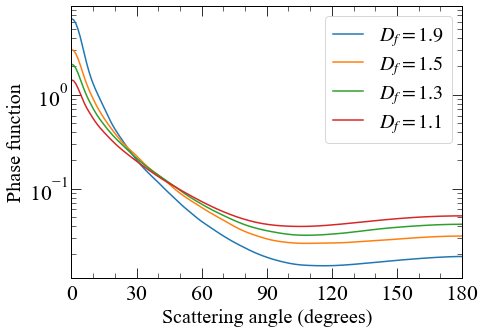

In [36]:
fig, ax =plt.subplots(figsize=(7,5))
ax.set_ylabel('Phase function',fontsize=20)
aggscatpy.plots.set_ang_vs_phase(ax)
for i in range(len(pt)):
    a=aggscatpy.dustmodel(partype=pt[i],size=nmono[i],amon='100nm',comp='amc')
    print('Reading dust model ... ',a.model)
    print('---> wavelength=%5.2f (um)'%a.lmd[4], 'maximum aggregate radius = %5.2f (um)'%a.acmax)
    ax.plot(a.scatang,a.phase[4,:],label=label[i])
ax.legend(fontsize=20,loc='best')

### Polarization phase functions

Let's give you one more example. In this example, we are going to see how the polarization phase function depends on aggregate radius and structure. Similar to the above example, we first make some lists:

In [37]:
nmono=['8','16','32','64','128','256','512','1024','2048','4096'] # a list of the number of monomers
label=['N=8','16','32','64','128','256','512','1024','2048','4096'] # a list of labels for lenged

Then, read and plot the dust models iteratively in the loop:

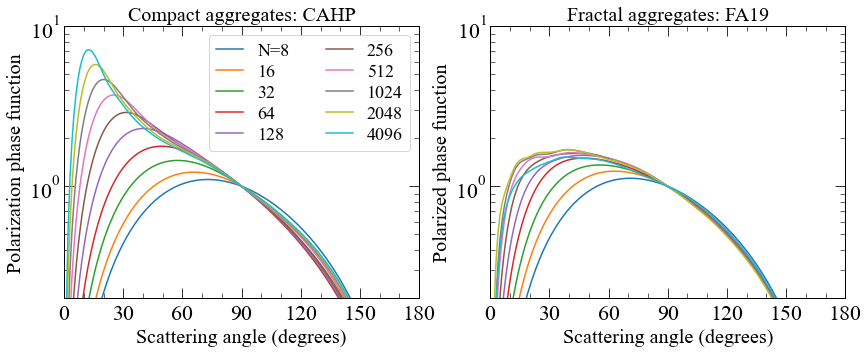

In [38]:
fig, (ax1,ax2) =plt.subplots(1,2,figsize=(14,5))
aggscatpy.plots.set_ang_vs_phase(ax1)
aggscatpy.plots.set_ang_vs_phase(ax2)
ax1.set_ylabel('Polarization phase function',fontsize=20)
ax1.set_ylim(2.0e-1,10)
ax1.set_title('Compact aggregates: CAHP',fontsize=20)
ax2.set_ylabel('Polarized phase function',fontsize=20)
ax2.set_ylim(2.0e-1,10)
ax2.set_title('Fractal aggregates: FA19',fontsize=20)
for i in range(len(nmono)):
    a1=aggscatpy.dustmodel(partype='CAHP',size=nmono[i],amon='100nm',comp='org')    
    a2=aggscatpy.dustmodel(partype='FA19',size=nmono[i],amon='100nm',comp='org')    
    ax1.plot(a1.scatang,a1.smat12[4,:]/a1.smat12[4,90],label=label[i])
    ax2.plot(a2.scatang,a2.smat12[4,:]/a2.smat12[4,90],label=label[i])
ax1.legend(fontsize=18,ncol=2,loc='best')